In [1]:
import oracle

oracle.q2_get_mnist_jpg_subset(23746)

Downloaded ZIP file to ./q2_data.zip
<zipfile.ZipFile filename='./q2_data.zip' mode='r'>
Extracted ZIP contents to q2_data


Epoch: 0, Batch: 0, Loss: 7.46909236907959
Epoch: 0, Batch: 100, Loss: 0.6493393182754517
Epoch: 0, Batch: 200, Loss: 0.7515865564346313
Epoch: 0, Batch: 300, Loss: 0.2678265869617462
Epoch: 0, Batch: 400, Loss: 0.6987564563751221
Epoch: 1, Batch: 0, Loss: 0.11938740313053131
Epoch: 1, Batch: 100, Loss: 0.24893434345722198
Epoch: 1, Batch: 200, Loss: 0.015649186447262764
Epoch: 1, Batch: 300, Loss: 0.3646542429924011
Epoch: 1, Batch: 400, Loss: 0.030952688306570053
Epoch: 2, Batch: 0, Loss: 0.13164059817790985
Epoch: 2, Batch: 100, Loss: 0.40318480134010315
Epoch: 2, Batch: 200, Loss: 0.06749490648508072
Epoch: 2, Batch: 300, Loss: 0.03737020120024681
Epoch: 2, Batch: 400, Loss: 0.3757370114326477
Epoch: 3, Batch: 0, Loss: 0.0835527777671814
Epoch: 3, Batch: 100, Loss: 0.07724316418170929
Epoch: 3, Batch: 200, Loss: 0.0014414001489058137
Epoch: 3, Batch: 300, Loss: 0.046982087194919586
Epoch: 3, Batch: 400, Loss: 0.13424494862556458
Epoch: 4, Batch: 0, Loss: 0.14812780916690826
Epoch: 

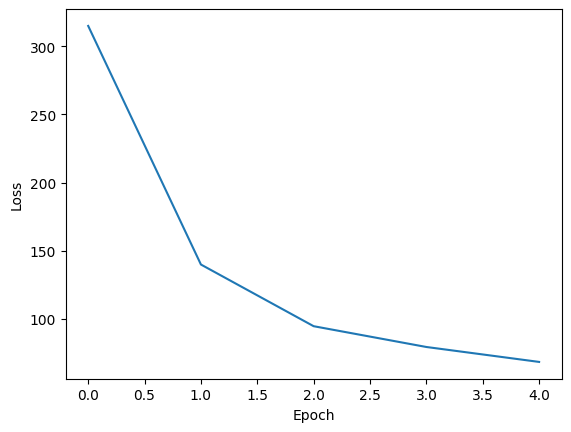

Accuracy: 0.9684


In [15]:
# implement mlp with the mnist images in directory q2_data, using torch and by flattening the images to 784 length vectors

import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler

# load the data
data_dir = 'q2_data'
images = []
# in the data directory there are 10 folders with names as 0, 1, 2, ..., 9
# each folder contains images of the respective digit

# add with labels
for i in range(10):
    folder = os.path.join(data_dir, str(i))
    for file in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, file), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        #flatten the image
        img = img.flatten()
        images.append((img, i))


# shuffle the data

np.random.shuffle(images)

# train test split not needed

# split the data into features and labels
X = []
y = []
for img, label in images:
    X.append(img)
    y.append(label)

X = np.array(X)
y = np.array(y)

# # standardize the data
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# convert to torch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# create a dataset
class MNISTDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
# create a model

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
# create a model
model = MLP()

# create a loss function
criterion = nn.CrossEntropyLoss()

# create an optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# create a data loader
dataset = MNISTDataset(X, y)
dataloader = DataLoader(dataset, batch_size=20, shuffle=True)

# train the model
num_epochs = 5
losses = []
for epoch in range(num_epochs):
    loss_sum = 0
    for i, (X_batch, y_batch) in enumerate(dataloader):
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        
        if i % 100 == 0:
            print(f'Epoch: {epoch}, Batch: {i}, Loss: {loss.item()}')

        loss_sum += loss.item()
    losses.append(loss_sum)

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


# test the model
correct = 0
total = 0
with torch.no_grad():
    for X_batch, y_batch in dataloader:
        y_pred = model(X_batch)
        _, predicted = torch.max(y_pred, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

print(f'Accuracy: {correct / total}')





Epoch: 0, Batch: 0, Loss: 8.095500946044922
Epoch: 0, Batch: 100, Loss: 0.9534860849380493
Epoch: 0, Batch: 200, Loss: 0.011225799098610878
Epoch: 0, Batch: 300, Loss: 0.4666121006011963
Epoch: 0, Batch: 400, Loss: 0.029464256018400192
Epoch: 0, Batch: 500, Loss: 0.006602433975785971
Epoch: 0, Batch: 600, Loss: 0.3775421977043152
Epoch: 0, Batch: 700, Loss: 0.5598100423812866
Epoch: 0, Batch: 800, Loss: 0.004207106772810221
Epoch: 0, Batch: 900, Loss: 0.18777574598789215
Epoch: 1, Batch: 0, Loss: 0.010081355459988117
Epoch: 1, Batch: 100, Loss: 0.06146727874875069
Epoch: 1, Batch: 200, Loss: 0.0682617574930191
Epoch: 1, Batch: 300, Loss: 0.03407799080014229
Epoch: 1, Batch: 400, Loss: 0.05372926592826843
Epoch: 1, Batch: 500, Loss: 0.004330100025981665
Epoch: 1, Batch: 600, Loss: 0.002735686721280217
Epoch: 1, Batch: 700, Loss: 0.01197387557476759
Epoch: 1, Batch: 800, Loss: 0.06571529060602188
Epoch: 1, Batch: 900, Loss: 0.4514804482460022
Epoch: 2, Batch: 0, Loss: 0.00112256931606680

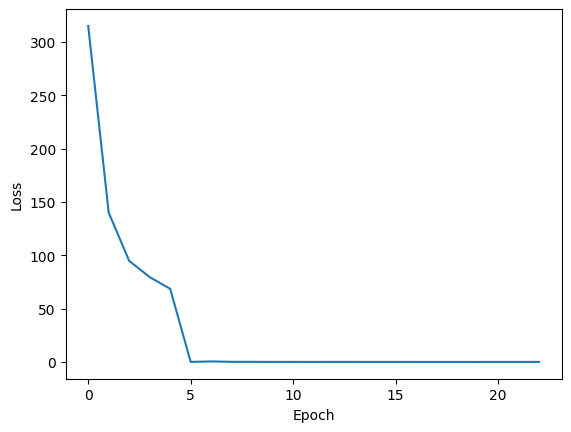

Accuracy: 0.9858


In [ ]:
# now run a cnn with images as matrices 28x28

# load the data
data_dir = 'q2_data'
images = []
# in the data directory there are 10 folders with names as 0, 1, 2, ..., 9
# each folder contains images of the respective digit

# add with labels

for i in range(10):
    folder = os.path.join(data_dir, str(i))
    for file in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, file), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        images.append((img, i)) 

# shuffle the data
np.random.shuffle(images)

# split the data into features and labels
X = []
y = []
for img, label in images:
    X.append(img)
    y.append(label)

X = np.array(X)
y = np.array(y)

# convert to torch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# create a dataset
class MNISTDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx].unsqueeze(0), self.y[idx]
    
# create a model

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(-1, 64 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
# create a model
model = CNN()

# create a loss function
criterion = nn.CrossEntropyLoss()

# create an optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# create a data loader
dataset = MNISTDataset(X, y)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# train the model
num_epochs = 5

for epoch in range(num_epochs):
    for i, (X_batch, y_batch) in enumerate(dataloader):
        loss_sum = 0
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        
        if i % 100 == 0:
            print(f'Epoch: {epoch}, Batch: {i}, Loss: {loss.item()}')

        loss_sum += loss.item()
    losses.append(loss_sum)

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# test the model
correct = 0
total = 0
with torch.no_grad():
    for X_batch, y_batch in dataloader:
        y_pred = model(X_batch)
        _, predicted = torch.max(y_pred, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

print(f'Accuracy: {correct / total}')


In [23]:
# now we extraxt features using principal component analysis using only numpy

# load the data
data_dir = 'q2_data'
images = []
# in the data directory there are 10 folders with names as 0, 1, 2, ..., 9
# each folder contains images of the respective digit

# add with labels
for i in range(10):
    folder = os.path.join(data_dir, str(i))
    for file in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, file), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        images.append((img, i)) 

# shuffle the data
np.random.shuffle(images)

# split the data into features and labels
X = []
y = []
for img, label in images:
    X.append(img.flatten())
    y.append(label)

X = np.array(X)
y = np.array(y)

# standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# calculate the covariance matrix
cov = np.cov(X.T)

# calculate the eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(cov)

# sort the eigenvectors by eigenvalues
sorted_indices = np.argsort(eigvals)[::-1]  
eigvals = eigvals[sorted_indices]
eigvecs = eigvecs[:, sorted_indices]    

# select the top k eigenvectors
k = 100
eigvecs = eigvecs[:, :k]

# project the data
X_pca = X.dot(eigvecs)

print(X_pca)


[[ -2.41880689 -15.21758183   0.240559   ...  -1.27097378   1.74326507
    0.06886808]
 [-22.30490684   0.11931363   5.46693886 ...  -1.75383893  -0.97545811
    1.01099019]
 [-12.76623719   7.78915259   5.78632215 ...  -0.47823693   0.26211862
   -1.08961061]
 ...
 [ -4.19171154   8.33806695  -2.8645022  ...  -0.64452549  -0.07617032
    0.82280422]
 [  2.60306606   4.16995479  -2.28716096 ...  -3.62917317  -1.33901836
   -1.3524069 ]
 [  3.72824089  -3.56322958   3.58122458 ...  -0.68694648   1.02029224
    1.37437479]]
